# Circle Class Separation



*   This project showcases a method to fit a simple classification model to a dataset with a non linear decision boundary
*   Support Vector machine using non linear kernel

Start by importing Libraries, create user defined function for extracting support vector boundary

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import pylab as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none', edgecolors='b');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Data set with 2 important features, x and Y. 
Visualized below in 2D feature space

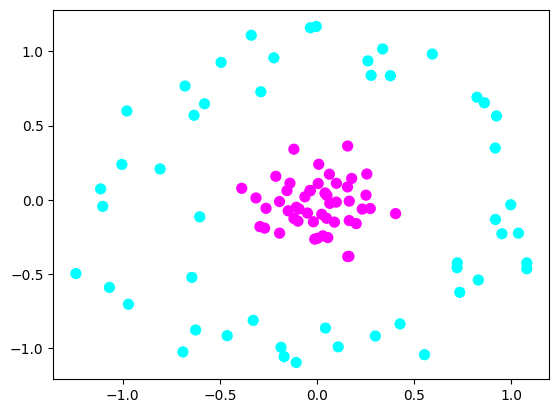

In [22]:
X, y = make_circles(100, factor=.1, noise=.15)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')

Use support vector machine to fit classification decision boundary.

Must first use radial basis function kernel to make classes linearly separable. 

Text(0.5, 1.0, 'Support Vector Classifier after radial basis function kernel')

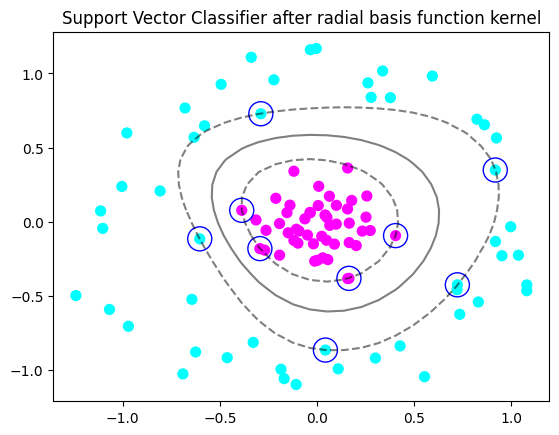

In [23]:
SVM = SVC(kernel='rbf', C=100)
SVM.fit(X, y)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(SVM, ax = ax)
ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
ax.set_title('Support Vector Classifier after radial basis function kernel')

In [ ]:
!pip install scikit-optimize

This first model is underfit, considers too few points in decision boundary.

Complete bayesian hyperparameter optimization and utilize new values in decision boundary fitting.

1.0 OrderedDict([('C', 16.201617296012834), ('gamma', 17.898731497997467)])
--- 12.49835729598999 seconds ---


Text(0.5, 1.0, 'Support Vector Classifier: Optimized Hyperparameters')

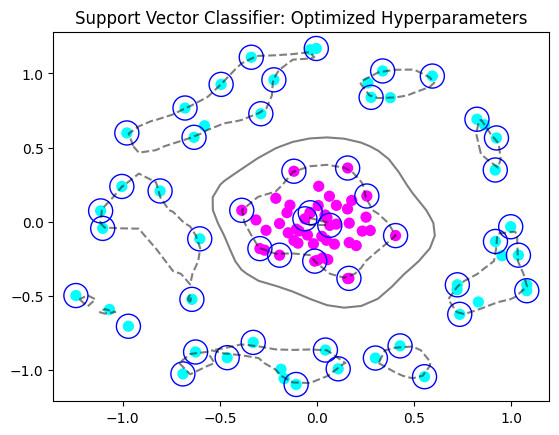

In [25]:
from skopt import BayesSearchCV


import time
start_time = time.time()

gs = BayesSearchCV(
    SVC(),
    {'C': (1e-1, 1e+2, 'log-uniform'),
     'gamma': (1e-1, 1e+2, 'log-uniform')},
    n_iter=15,
    cv=5)

gs = gs.fit(X, y)
print(gs.best_score_, gs.best_params_)
print("--- %s seconds ---" % (time.time() - start_time))

ParamsList = list(gs.best_params_.values())
SVM = SVC(kernel='rbf', C=ParamsList[0], gamma=ParamsList[1])
SVM.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(SVM, ax = ax)
ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
ax.set_title('Support Vector Classifier: Optimized Hyperparameters')